In [2]:
# This was modified from Tensorflow tutorial: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
# All appropriate copywrites are retained, use of this material is guided by fair use for teaching
# Some modifications made for course STA 208 by James Sharpnack jsharpna@gmail.com

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification with Tensorflow

## Davis SML: Lecture 9 Part 2

## Prof. James Sharpnack

### Importing and installing tensorflow

- install tensorflow 2.0 with conda (you do not need to install tensorflow-gpu for the course)
- tensorflow, build and execute computational graphs
- tensorflow 1.0 and 2.0 differ mainly by making eager execution default, removing sessions

Meaning that we can run the computational graph outside the session, in order sequentially.

In [ ]:
#conda install keras tensorflow

In [27]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.utils.vis_utils import plot_model

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

TensorFlow version: 2.0.0
Eager execution: True
Num GPUs Available:  0
Num CPUs Available:  1
Using TensorFlow backend.


### Loading data

- tensorflow has many built in utilities for getting data
- you could just as easily use requests/pandas

In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: C:\SPB_Data\.keras\datasets\iris_training.csv


In [6]:
train_df = pd.read_csv(train_dataset_fp)
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values[:,:-1],train_df.values[:,-1]))

### Tensorflow datasets API

- Datasets API loads and readies data for use in stochastic gradient descent type iteration
- the batch size tells it how many samples for the mini-batch
- Dataset has methods to shuffle the data and apply transformations 

In [7]:
batch_size = 32

train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(batch_size)
## sets batchsize and shuffles

In [8]:
X,y = next(iter(train_dataset))
X

<tf.Tensor: id=18, shape=(32, 4), dtype=float64, numpy=
array([[5.8, 2.7, 4.1, 1. ],
       [5.7, 3. , 4.2, 1.2],
       [5. , 3.4, 1.5, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [4.6, 3.4, 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 3.8, 6.7, 2.2],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [4.8, 3.4, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [4.4, 3.2, 1.3, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.6, 2.9, 4.6, 1.3],
       [6.3, 2.5, 5. , 1.9],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 3. , 1.4, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.8, 4.8, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [4.4, 3. , 1.3, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2]])>

### Keras Model API

- a model is a predictor which builds a computational graph, maintains losses, prepares for optimization
- built from layers which are operations in computational graph
- layers have trainable variables, input and output tensor shapes

In [9]:
train_dataset.element_spec

(TensorSpec(shape=(None, 4), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [14]:
tf.keras.backend.set_floatx('float64')
lin_layers = tf.keras.layers.Dense(3)
lin_layers(X)
## Builds and calls the layer
# 3 is t he output shape (we have 3 classes)
# so the dense layer has 32 inputs and 3 outputs
# 2 total layers
# first layer with 32 nodes and the second layer with 3 nodes.


<tf.Tensor: id=150, shape=(32, 3), dtype=float64, numpy=
array([[ 0.19715791, -2.65199814, -1.89507023],
       [ 0.11810277, -3.07360605, -1.99518786],
       [-1.36611156, -0.69997234, -1.99148885],
       [ 0.27133565, -4.0130654 , -2.17399727],
       [-1.21147563, -0.44321155, -1.81847692],
       [-1.21158338, -0.52383741, -1.86001924],
       [-1.53334467, -0.95393928, -2.14527836],
       [-1.45407403, -0.37107966, -1.9620761 ],
       [-1.59999474, -0.36751234, -2.14992359],
       [ 1.08962067, -4.78793556, -2.38606975],
       [-1.37471903, -0.87967459, -1.93511096],
       [ 0.12377464, -3.07722957, -1.8710775 ],
       [ 0.78177196, -5.28057684, -2.65313751],
       [-0.18159187, -2.68179269, -2.02370875],
       [ 1.22866186, -4.64750795, -2.31820406],
       [ 0.67957201, -4.01662179, -2.1137351 ],
       [-1.27793359, -0.86761332, -1.93781696],
       [-1.35051682, -0.58363917, -1.88634261],
       [ 0.18466848, -2.56857843, -1.83430551],
       [-1.3043791 , -0.7183947

In [15]:
lin_layers.trainable_variables

[<tf.Variable 'dense_4/kernel:0' shape=(4, 3) dtype=float64, numpy=
 array([[-0.15379239,  0.44918537, -0.22061611],
        [-0.42148004, -0.47740489, -0.29029364],
        [ 0.57419492, -0.77803903,  0.09548661],
        [-0.1270493 , -0.77832004, -0.22319903]])>,
 <tf.Variable 'dense_4/bias:0' shape=(3,) dtype=float64, numpy=array([0., 0., 0.])>]

In [16]:
## create a keras model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3)
])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
## model is callable outputs decision function
logits = model(X)
logits[:5]

<tf.Tensor: id=182, shape=(5, 3), dtype=float64, numpy=
array([[-6.85618146, -4.55284752,  6.55058938],
       [-6.9468754 , -4.65034573,  6.47356689],
       [-5.44786264, -5.87296937,  3.36803636],
       [-7.27449514, -4.58619917,  7.25579513],
       [-5.0959646 , -5.44975128,  3.30536745]])>

In [18]:
## Apply softmax to logits to get predicted probabilities
tf.nn.softmax(logits[:5])

<tf.Tensor: id=187, shape=(5, 3), dtype=float64, numpy=
array([[1.50489503e-06, 1.50602239e-05, 9.99983435e-01],
       [1.48446143e-06, 1.47549955e-05, 9.99983761e-01],
       [1.48319132e-04, 9.69562183e-05, 9.99754725e-01],
       [4.89296127e-07, 7.19587956e-06, 9.99992315e-01],
       [2.24482187e-04, 1.57592041e-04, 9.99617926e-01]])>

In [19]:
y_pred = tf.argmax(logits, axis=1)

In [20]:
#similar to binary crossentropy for logistical regression
#sparse means y= 0,1,2 and not one hot encoded
## Create the losses
logistic_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

logistic_loss(y,logits)

<tf.Tensor: id=213, shape=(), dtype=float64, numpy=7.322078704833984>

In [21]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=training)

  return logistic_loss(y,logits)


l = loss(model, X, y, training=False)
print("Loss test: {}".format(l))

Loss test: 7.322078704833984


### Automatic differentiation

- Tensorflow knows how to differentiate built in expressions (exp, matmul, log, etc.)
- you can also use chain rule to "backpropagate" derivatives (more on this later)
- as a simple case, consider linear classifier with loss $\ell(y x^\top \beta)$ (eg logistic)

If tensorflow has $\ell$ and $\ell'$ saved then it can automatically perform the following op
$$\frac{\partial}{\partial \beta} \ell(y x^\top \beta) = \ell'(y x^\top \beta) \cdot y x$$
this is the simplest example of automatic differentiation.

In [34]:
## Gradient tape lets TF know with respect to what to take gradients
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [35]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [36]:
loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True).numpy()))

Step: 0, Initial Loss: 7.322078704833984
Step: 1,         Loss: 6.928747177124023


In [37]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 5.720, Accuracy: 35.000%
Epoch 050: Loss: 0.519, Accuracy: 70.833%
Epoch 100: Loss: 0.455, Accuracy: 83.333%
Epoch 150: Loss: 0.403, Accuracy: 90.833%
Epoch 200: Loss: 0.381, Accuracy: 96.667%


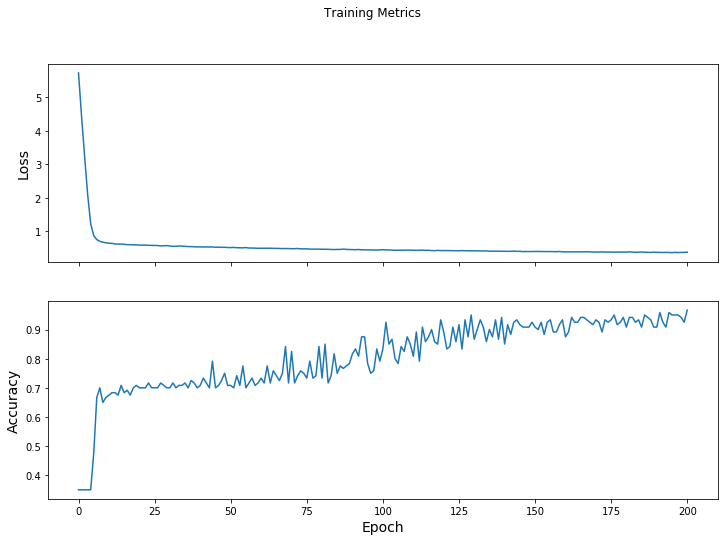

In [38]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [39]:
## Evaluate on test set

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [41]:
test_df = pd.read_csv(test_fp)
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values[:,:-1],test_df.values[:,-1]))
test_dataset = test_dataset.batch(batch_size)

In [42]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [43]:
## Last batch actual labels and predicted
print("\n".join(f"actual: {a} =? pred: {b}" for a,b in zip(y,prediction)))

actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 2.0 =? pred: 2
actual: 0.0 =? pred: 0
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 0.0 =? pred: 0
actual: 2.0 =? pred: 2
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 2
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 1
